<a href="https://colab.research.google.com/github/Tanvii26/Research-Probation/blob/main/222_Tanvi_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

---
# Neural Network from Scratch 
---

In [ ]:
# activation and loss functions
def sigmoid(x): #value range 0 to 1
  return 1/(1 + np.exp(-x))

def sigmoid_der(x):
  return (1-sigmoid(x))*sigmoid(x)

def tanh(x): #value range -1 to +1
  return np.tanh(x)

def tanh_der(x):
  return 1 - np.tanh(x)**2

def relu(x): #value range 0 to inf
  return np.maximum(0,x)

def relu_der(x):
  return np.where(x>0, 1, 0)

#binary cross-entropy
def log_loss(y_true, y_pred):
  return -(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

def log_loss_der(y_true, y_pred):
  return (y_pred - y_true)/(y_pred*(1-y_pred))

In [ ]:
#Neural Network Layers Class

class Layer:
  def __init__(self, neurons_no, inputs_no, activ_func):
    self.neurons_no = neurons_no
    self.inputs_no = inputs_no
    self.activ_func = activ_func
    self.weights = np.random.randn(neurons_no,inputs_no)
    self.b = np.zeros((neurons_no,1))
    self.rate = 0.1

  def activate(self,x):
    if self.activ_func == 'sigmoid':
      return sigmoid(x)
    elif self.activ_func == 'relu':
      return relu(x)
    elif self.activ_func == 'tanh':
      return tanh(x)
    else:
      raise ValueError("Please provide a reasonable activation function")


  def activate_der(self,x):
    if self.activ_func == 'sigmoid':
      return sigmoid_der(x)
    elif self.activ_func == 'relu':
      return relu_der(x)
    elif self.activ_func == 'tanh':
      return tanh_der(x)
    else:
      raise ValueError("Please provide a reasonable activation function")


  def feed_forward(self,inputs):
    # Feed Forward eqn: Take inp, multiply by w, add b and apply activation func
    self.inputs = inputs
    self.z = np.dot(self.weights, self.inputs) + self.b
    self.output = self.activate(self.z)
    return self.output


  def back_prop(self, dA):
  # going back in our network, calc partial derivatives and apply learning eqn(for w and b)
    dZ = np.multiply(self.activate_der(self.z), dA)

    dW = 1/dZ.shape[1] * np.dot(dZ,self.inputs.T)
    db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)

    output = np.dot(self.weights.T, dZ)

    self.weights -= self.rate * dW
    self.b -= self.rate * db 

    return output




In [ ]:
# --Training to learn XOR function--

X_train = np.array([[0,0,1,1], [0,1,0,1]])
y_train = np.array([[0,1,1,0]])

# samples and epochs
m = 4
epochs = 1000

layers = [Layer(3,2,'tanh'), Layer(1,3,'sigmoid')]
costs =[]



In [ ]:
for epoch in range(epochs):
  pred = X_train
  # Feed Forward
  for layer in layers:
    pred = layer.feed_forward(pred)

  cost = 1/m * np.sum(log_loss(y_train,pred))
  costs.append(cost)

  # Back Propagation
  dA = log_loss_der(y_train,pred)
  for layer in reversed(layers):
    dA = layer.back_prop(dA)


In [ ]:
#---Predicting---
predict = X_train
for layer in layers:
  predict = layer.feed_forward(predict)
print(predict) 

[[0.03208052 0.9130075  0.94549131 0.09825979]]


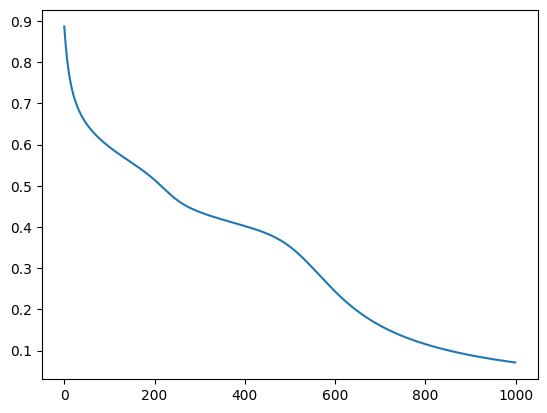

In [ ]:
# loss plot
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)

---
# MLP Classifier of sklearn
---

In [ ]:
'''
The variable names are as follows:

Number of times pregnant.
Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
Diastolic blood pressure (mm Hg).
Triceps skinfold thickness (mm).
2-Hour serum insulin (mu U/ml).
Body mass index (weight in kg/(height in m)^2).
Diabetes pedigree function.
Age (years).
Class variable (0 or 1).

'''

'\nThe variable names are as follows:\n\nNumber of times pregnant.\nPlasma glucose concentration a 2 hours in an oral glucose tolerance test.\nDiastolic blood pressure (mm Hg).\nTriceps skinfold thickness (mm).\n2-Hour serum insulin (mu U/ml).\nBody mass index (weight in kg/(height in m)^2).\nDiabetes pedigree function.\nAge (years).\nClass variable (0 or 1).\n\n'

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,pregnancies,plasma glucose concentration,diastolic blood pressure,triceps skinfold thickness,insulin,body mass index,diabetes pedigree function,age,diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

pregnancies                     0
plasma glucose concentration    0
diastolic blood pressure        0
triceps skinfold thickness      0
insulin                         0
body mass index                 0
diabetes pedigree function      0
age                             0
diabetic                        0
dtype: int64

In [ ]:
X = df.iloc[:,:-1].values
y = df['diabetic'].values

In [ ]:
# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def accuracy(confusion_matrix):
   correct_predict = confusion_matrix.trace()
   total_predict = confusion_matrix.sum()
   return correct_predict/total_predict

In [ ]:
#create classifier and train model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
mlpClass = MLPClassifier(hidden_layer_sizes=(5), max_iter=1200, activation='relu')

mlpClass.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1200)

In [ ]:
y_pred = mlpClass.predict(X_test)

res = confusion_matrix(y_pred,y_test)
print("Accuracy: ", accuracy(res))

Accuracy:  0.7792207792207793


---
# Keras Library
---

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

# Sequential API -> layer-by-layer model creation
# Functional API -> complex models, shared layers and multiple inputs

model = Sequential()

In [ ]:
model.add(Dense(9, input_shape=(8,), activation='relu'))
model.add(Dense(6, activation='relu')) # 1 hidden layer only
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# adam - stochastic gradient descent algo -> auto tune itself

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 2s 2ms/step - loss: 0.6940 - accuracy: 0.5375
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6124
Epoch 3/150
62/62 [==============================] - 0s 6ms/step - loss: 0.6395 - accuracy: 0.6857
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.7150
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7313
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7443
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.7508
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7557
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7687
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7671
Epoch 11/

In [ ]:
_,accuracy = model.evaluate(X_train, y_train)
print("Accuracy: ", accuracy) 

20/20 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8013
Accuracy:  0.8013029098510742


Text(0, 0.5, 'Accuracy')

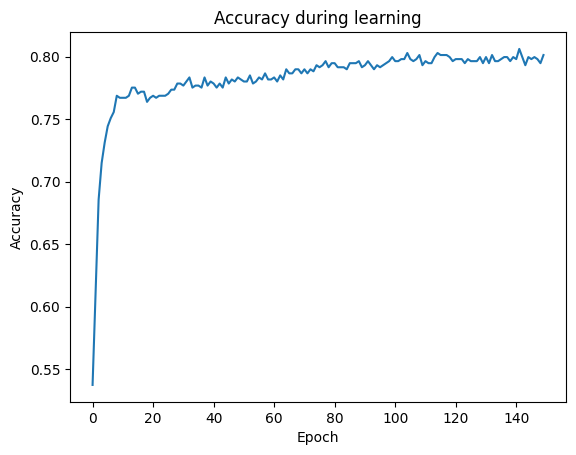

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy during learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

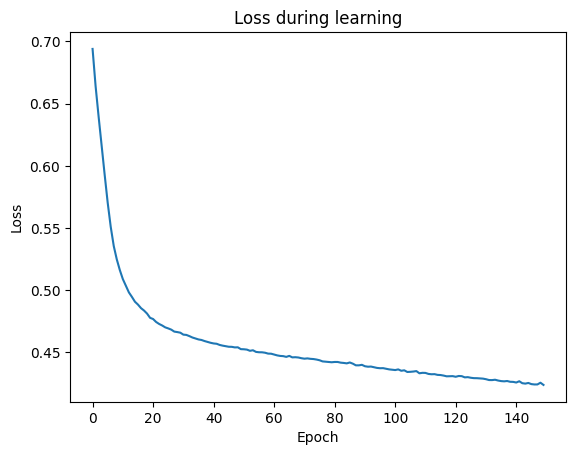

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss during learning')
plt.xlabel('Epoch')
plt.ylabel('Loss')

---
# Tuning batch-size with cross-validation
with the brute force Grid-Search tuning method
---

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier

In [ ]:
#K-Fold Cross Validation
batch_sizes = [20, 40, 60, 80, 100]
epoch = [10, 50, 100]
param_grid_search = {'batch_size': batch_sizes, 'epochs':epoch}

estimator_model = KerasClassifier(model=model, verbose=0)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=estimator_model, param_grid=param_grid_search,cv=kfold, n_jobs=-1)

grid_result = grid.fit(X,y)

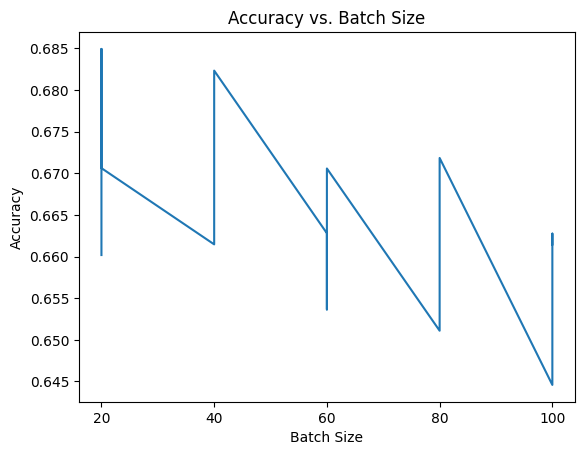

In [ ]:
mean_scores = grid_result.cv_results_['mean_test_score']
batch_sizes_plot = [str(param) for param in grid_result.cv_results_['param_batch_size']]

# print(mean_scores)
# print(batch_sizes_plot)
# Plot accuracy vs. batch size

plt.plot(batch_sizes_plot, mean_scores)
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Batch Size')
plt.show()


In [ ]:
# Best results
print (f'{grid_result.best_score_} using {grid_result.best_params_}')

0.6849418555300909 using {'batch_size': 20, 'epochs': 50}


---
# CNN
---
Input Layer-> Convolutional Layer-> Activation Layer-> Pooling Layer(reduce volume size)-> Flattening(into 1-D vector)-> Fully Connected layer-> Output

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import random 
import matplotlib.image as mpimg

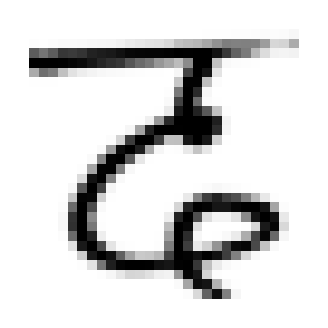

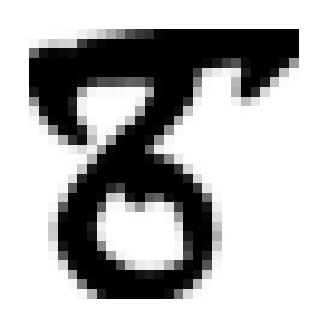

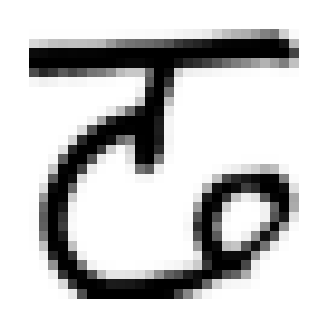

In [ ]:
path ='/content/gdrive/MyDrive/Assignments/CharacterImageDataset'
for i in range(3):
  folder_name = random.choice(os.listdir(path))
  class_name = random.choice(os.listdir(path + '/' + folder_name))
  image_name = random.choice(os.listdir(path + '/' +folder_name + '/' + class_name))

  image_path = '/content/gdrive/MyDrive/Assignments/CharacterImageDataset/test/' + class_name + "/" + image_name
  image = mpimg.imread(image_path)

  plt.figure(figsize=(4,4))
  plt.imshow(image, cmap='Greys')
  plt.axis('off')
  plt.show()

Epoch 1/10
25/25 [==============================] - 3s 66ms/step - loss: 16.4828 - accuracy: 0.3425 - val_loss: 1.6215 - val_accuracy: 0.5750
Epoch 2/10
25/25 [==============================] - 1s 46ms/step - loss: 0.9975 - accuracy: 0.6637 - val_loss: 0.7585 - val_accuracy: 0.7400
Epoch 3/10
25/25 [==============================] - 1s 58ms/step - loss: 0.4743 - accuracy: 0.8487 - val_loss: 0.5274 - val_accuracy: 0.8250
Epoch 4/10
25/25 [==============================] - 2s 84ms/step - loss: 0.2347 - accuracy: 0.9162 - val_loss: 0.3556 - val_accuracy: 0.8600
Epoch 5/10
25/25 [==============================] - 2s 85ms/step - loss: 0.1225 - accuracy: 0.9712 - val_loss: 0.3021 - val_accuracy: 0.8750
Epoch 6/10
25/25 [==============================] - 1s 46ms/step - loss: 0.0613 - accuracy: 0.9837 - val_loss: 0.2905 - val_accuracy: 0.9050
Epoch 7/10
25/25 [==============================] - 1s 45ms/step - loss: 0.0366 - accuracy: 0.9962 - val_loss: 0.3172 - val_accuracy: 0.9100
Epoch 8/10
2

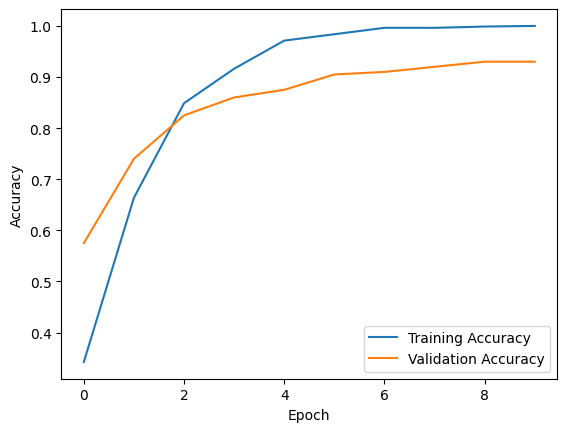

32/32 [==============================] - 1s 13ms/step
Precision: [0.89552239 0.03030303 0.         0.         0.00952381 0.07142857
 0.04081633 0.41891892 0.05109489 0.        ]
Recall: [0.6  0.03 0.   0.   0.01 0.03 0.04 0.93 0.07 0.  ]
F1-Score: [0.71856287 0.03015075 0.         0.         0.0097561  0.04225352
 0.04040404 0.57763975 0.05907173 0.        ]
Average Accuracy: 0.171


In [ ]:
# Create your custom CNN architecture. Decide the number of CONV, POOL, FC layers, and their configurations yourself. Split the data into 80-20 proportions (use “stratified” sampling) for training and testing, use 20% of this training data for validation. Decide any appropriate learning rate, and perform training for a suitable number of epochs. Observe the training performance using learning plots (display them after training, give your comments w.r.t. overfitting and/or underfitting), you should decide the number of epochs based on these learning plots. Evaluate your trained model on the test data. Output precision, recall, F1-score for each class, and also find the average accuracy. 

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers

# Define the paths to your Train and Test folders
train_folder = '/content/gdrive/MyDrive/Assignments/CharacterImageDataset/train'
test_folder = '/content/gdrive/MyDrive/Assignments/CharacterImageDataset/test'

# Load the training data
X_train = []
y_train = []

train_folders = os.listdir(train_folder)
for label, folder in enumerate(train_folders):
    folder_path = os.path.join(train_folder, folder)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        X_train.append(image)
        y_train.append(label)

# Load the test data
X_test = []
y_test = []

test_folders = os.listdir(test_folder)
for label, folder in enumerate(test_folders):
    folder_path = os.path.join(test_folder, folder)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        X_test.append(image)
        y_test.append(label)

# Convert the lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Define your custom CNN model
model = tf.keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Add more convolutional and pooling layers as needed
    
    # Flatten the feature maps
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (assuming 10 classes in the dataset)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Plot the learning curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate precision, recall, F1-score for each class
precision = precision_score(y_test, y_pred_labels, average=None)
recall = recall_score(y_test, y_pred_labels, average=None)
f1score = f1_score(y_test, y_pred_labels, average=None)

# Calculate average accuracy
average_accuracy = accuracy_score(y_test, y_pred_labels)

# Print the performance metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1score}")
print(f"Average Accuracy: {average_accuracy}")
#accuracy is low due to a small data for training

---
# RNN
---
RNN :- current state = f(previous state, input)

LSTM: Long Short-Term Memory to retain info for long period of time.

In [ ]:
df_text = pd.read_csv('/content/a2_text - a2_text.csv')

In [ ]:
df_text.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_text['content'])

In [ ]:
sequence = tokenizer.texts_to_sequences(df_text['content'])
max_len = max([len(seq) for seq in sequence])


In [ ]:
idx = tokenizer.word_index
vocab = len(idx) + 1

In [ ]:
data = pad_sequences(sequence, maxlen=max_len)

target = pd.get_dummies(df_text['sentiment'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


vocab = len(idx) + 1

model = Sequential()
model.add(Embedding(vocab, 100, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10
1000/1000 [==============================] - 180s 177ms/step - loss: 2.0142 - accuracy: 0.3002
Epoch 2/10
1000/1000 [==============================] - 176s 176ms/step - loss: 1.7101 - accuracy: 0.4173
Epoch 3/10
1000/1000 [==============================] - 174s 174ms/step - loss: 1.2677 - accuracy: 0.5825
Epoch 4/10
1000/1000 [==============================] - 173s 173ms/step - loss: 0.8290 - accuracy: 0.7381
Epoch 5/10
1000/1000 [==============================] - 173s 173ms/step - loss: 0.5534 - accuracy: 0.8272
Epoch 6/10
1000/1000 [==============================] - 173s 173ms/step - loss: 0.3974 - accuracy: 0.8726
Epoch 7/10
1000/1000 [==============================] - 175s 175ms/step - loss: 0.3024 - accuracy: 0.9029
Epoch 8/10
1000/1000 [==============================] - 175s 175ms/step - loss: 0.2404 - accuracy: 0.9218
Epoch 9/10
1000/1000 [==============================] - 174s 174ms/step - loss: 0.2034 - accuracy: 0.9332
Epoch 10/10
250/250 [=========================

In [ ]:
# --- Comparing 2 differing configurations ----

from sklearn.preprocessing import LabelEncoder

X = df_text['content'].values
y = df_text['sentiment'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Convert the labels to numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Get the vocabulary size
vocab = len(tokenizer.word_index) + 1

# Pad sequences to make the same length
max_len = max(len(seq) for seq in X_train_seq + X_test_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)


In [ ]:
configs = [
    {'hidden_layers': 1, 'lstm_units': 25},
    {'hidden_layers': 2, 'lstm_units': 50}
]


histories = []
for config in configs:
    # Define the LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=vocab, output_dim=100, input_length=max_len))
    for _ in range(config['hidden_layers']):
        model.add(LSTM(units=config['lstm_units'], return_sequences=True))
    model.add(LSTM(units=config['lstm_units']))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Reshape input data
    X_train_padded_reshaped = X_train_padded.reshape((X_train_padded.shape[0], X_train_padded.shape[1], 1))
    X_test_padded_reshaped = X_test_padded.reshape((X_test_padded.shape[0], X_test_padded.shape[1], 1))
    
    # Train the model
    history = model.fit(X_train_padded_reshaped, y_train, validation_data=(X_test_padded_reshaped, y_test), epochs=10, batch_size=32, verbose=0)
    histories.append(history)



In [ ]:
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Config {i+1}')

plt.title('Accuracy for Different LSTM Configurations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show()
